In [1]:
# pip install tensorflow==2.0.0-beta1
try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.1.0-rc1


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [3]:
dataset = load_data()
type(dataset)

tuple

In [0]:
(X_train, y_train), (X_test, y_test) = dataset
# X_train.shape       (60000, 28, 28)
# y_train.shape       (60000,)
# X_test.shape        (10000, 28, 28)
# y_test.shape        (10000,)

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
N, _, _ = X_train.shape
Xtrain = X_train.reshape(N, -1)
# Xtrain.shape     (60000, 784)
N, D = Xtrain.shape
K = len(set(y_train))
# print(K)         10

In [0]:
N, _, _ = X_test.shape
Xtest = X_test.reshape(N, -1)
# Xtest.shape      (10000, 784)

In [0]:
model = Sequential()
model.add(Dense(128, input_dim=D, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(K, activation='softmax'))

In [0]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [10]:
r = model.fit(Xtrain, y_train, validation_data=(Xtest, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2950 - accuracy: 0.9141 - val_loss: 0.1408 - val_accuracy: 0.9589
Epoch 2/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1420 - accuracy: 0.9576 - val_loss: 0.0973 - val_accuracy: 0.9714
Epoch 3/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1064 - accuracy: 0.9681 - val_loss: 0.0918 - val_accuracy: 0.9727
Epoch 4/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0887 - accuracy: 0.9732 - val_loss: 0.0810 - val_accuracy: 0.9753
Epoch 5/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0757 - accuracy: 0.9762 - val_loss: 0.0746 - val_accuracy: 0.9776
Epoch 6/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0654 - accuracy: 0.9790 - val_loss: 0.0772 - val_accuracy: 0.9766
Epoch 7/10
60000/60000 [==============================] 

Text(0.5, 1.0, 'Training & Test Loss')

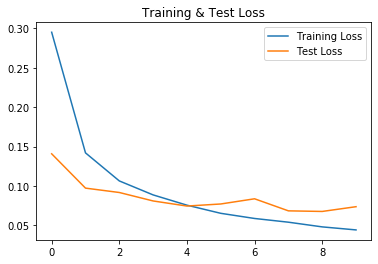

In [11]:
plt.plot(r.history['loss'], label='Training Loss')
plt.plot(r.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Training & Test Loss')

Text(0.5, 1.0, 'Training & Test Accuracy')

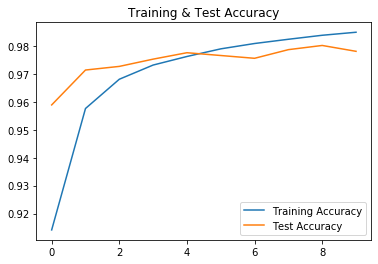

In [12]:
plt.plot(r.history['accuracy'], label='Training Accuracy')
plt.plot(r.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title('Training & Test Accuracy')

In [0]:
pred = model.predict(Xtest)
# pred.shape         (10000, 10)

In [0]:
pred = np.argmax(pred, axis=1)
# pred.shape         (10000,)

In [17]:
print("Manual accuracy:", np.mean(pred == y_test))
print("Evaluate output:", model.evaluate(Xtest, y_test))

Manual accuracy: 0.9781
10000/10000 [==============================] - 1s 57us/sample - loss: 0.0738 - accuracy: 0.9781
Evaluate output: [0.07375603048641934, 0.9781]
